In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as Imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)
df["target"]=load_breast_cancer().target
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

from above we had concluded that the data does not contain the null values in the data sop we can now able to avoid the imputaion and all the data is the numerical values so now we can avoid the encoding in the future selection process

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

from the above we had concluded that the given data is inbalance

# EDA

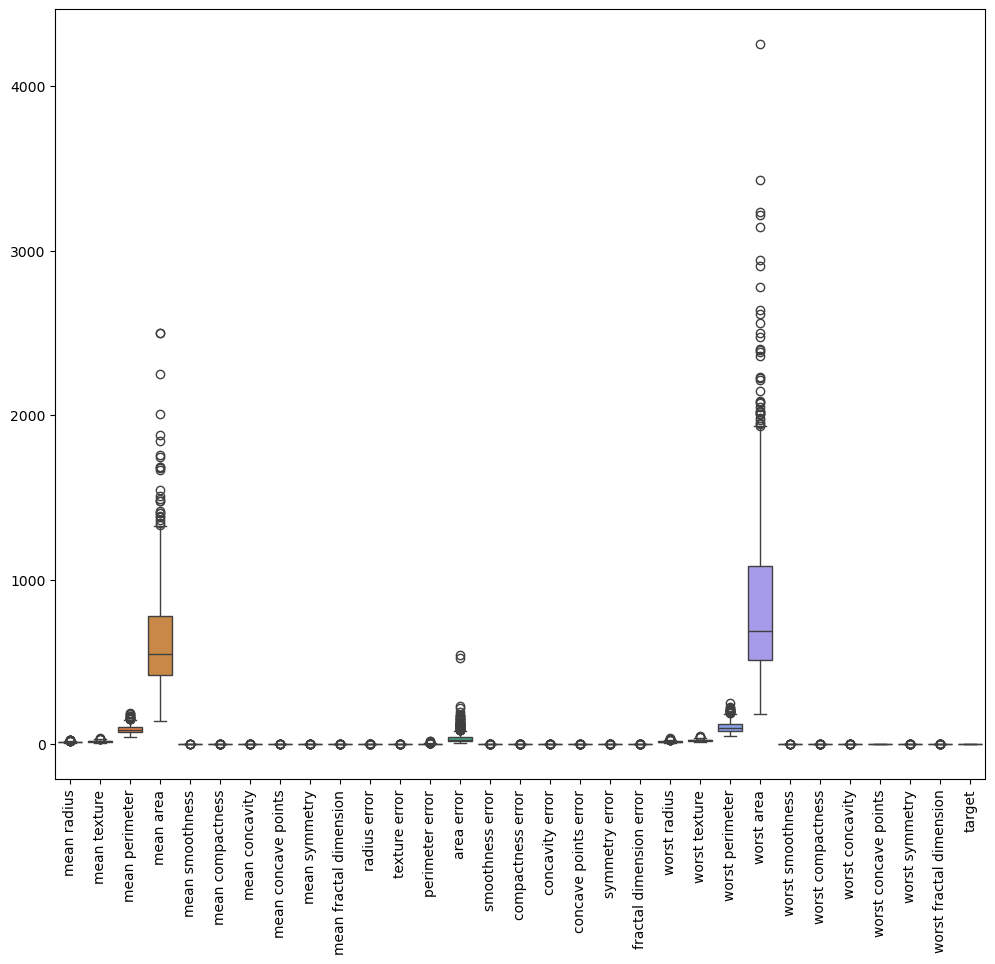

In [10]:
fig=plt.figure(figsize=(12,10))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

we observe the ouliers in the data so i can need to remove ouliers in the data

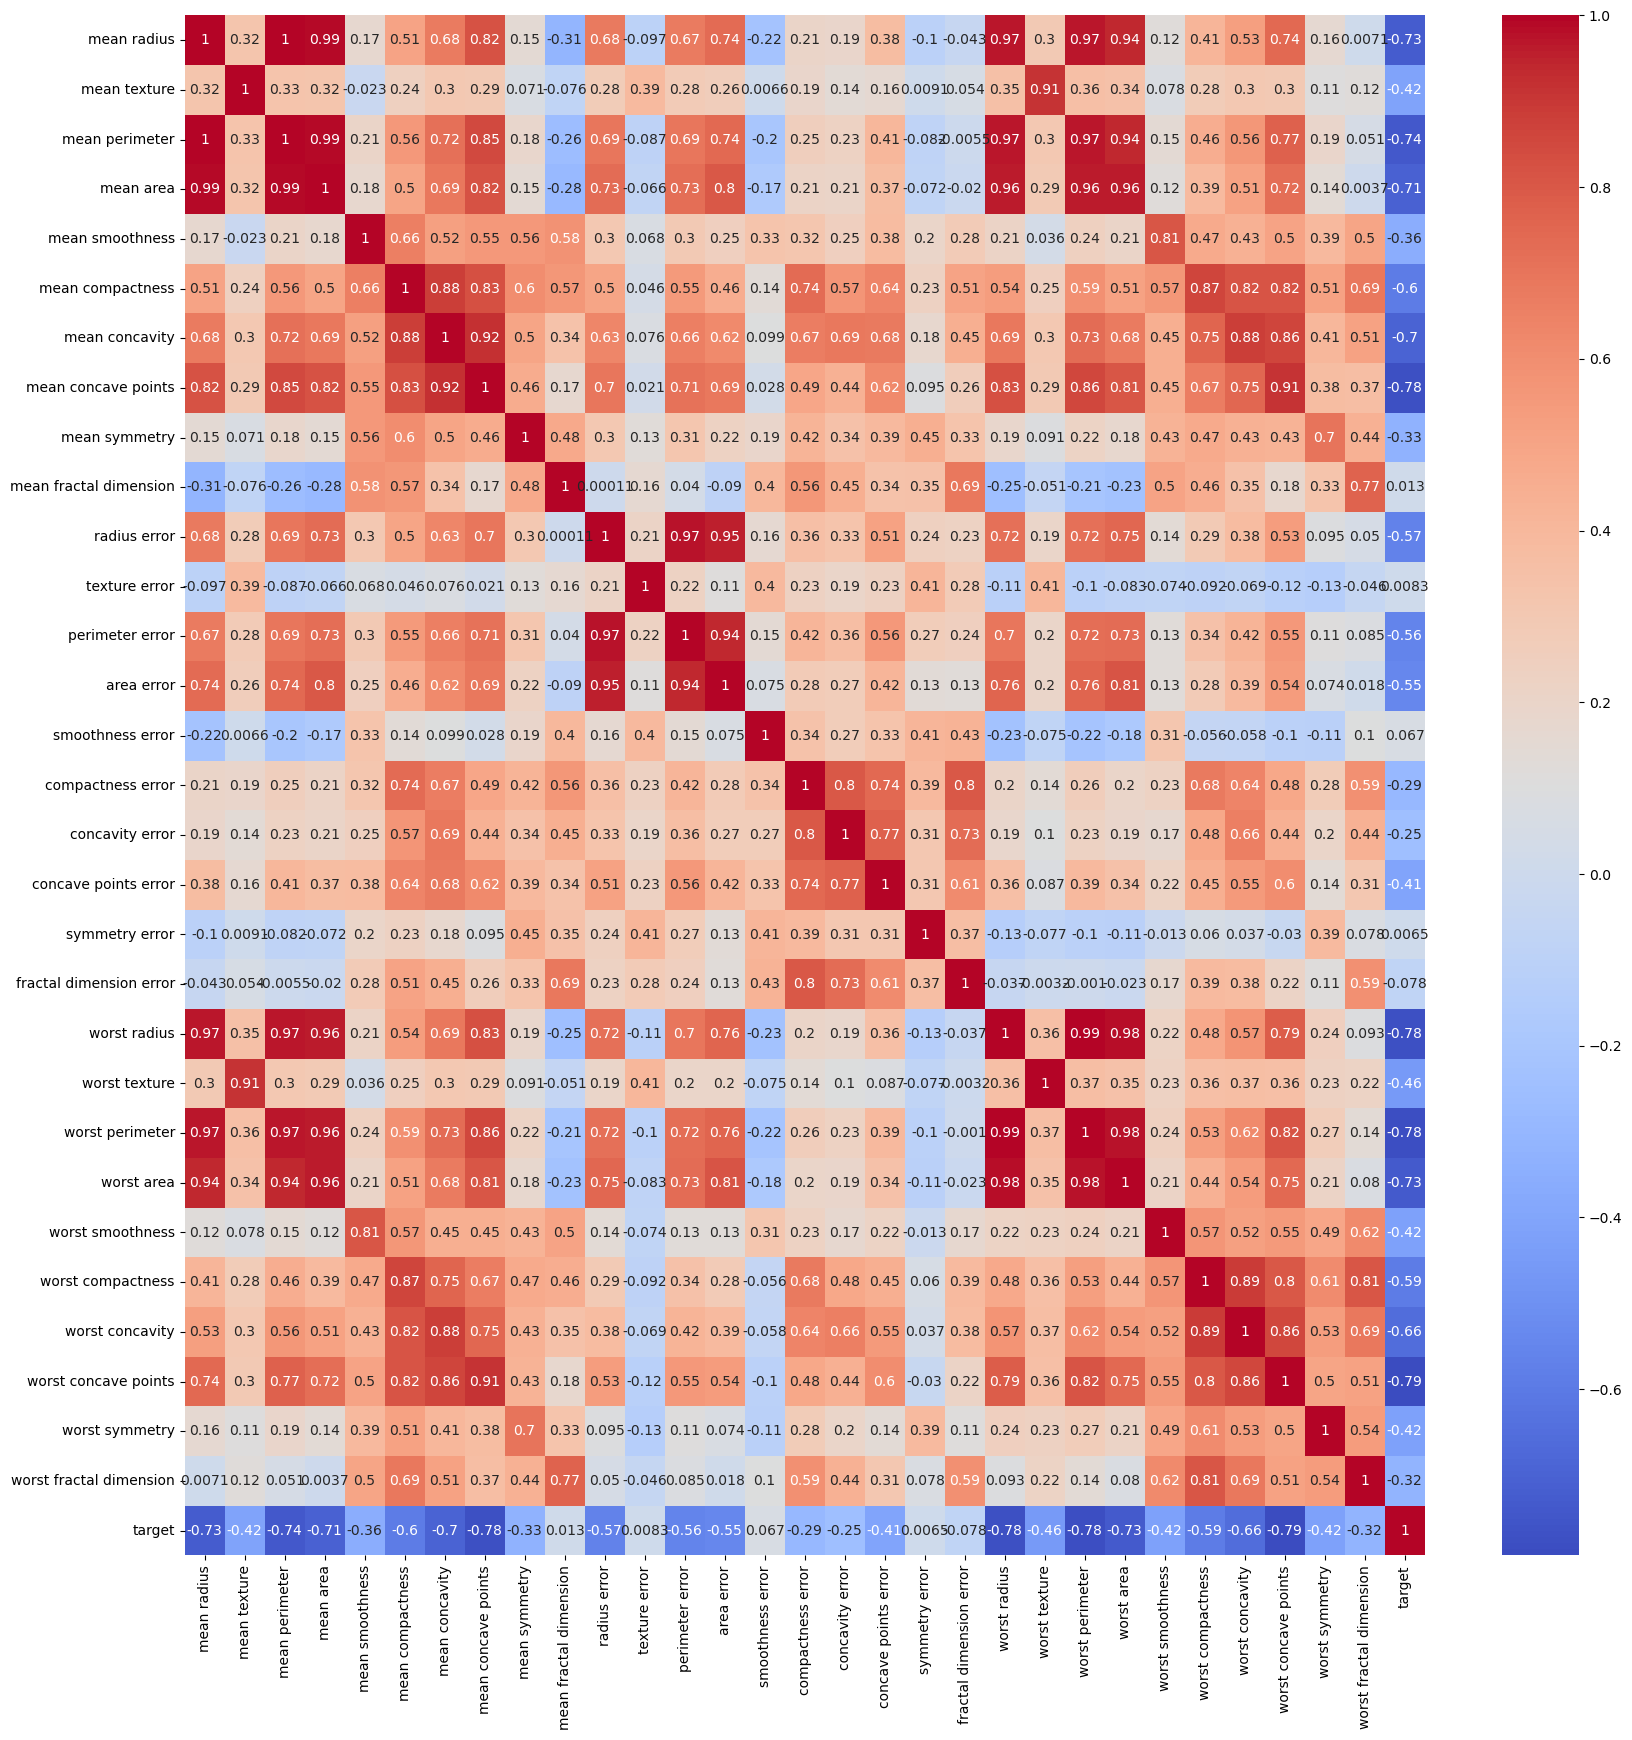

In [19]:
fig=plt.figure(figsize=(20,20))
relation=df.corr()
sns.heatmap(relation,annot=True,cmap="coolwarm")
plt.show()

from the above we had observe we had observe that many values have multicollinearilty so now we can do the data decompostion

# Feature Engineering

In [27]:
y=df.pop("target")
x=df

In [28]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [32]:
for i in x_train:
    skew=df[i].skew().round()
    if skew==0:
        mean=df[i].mean()
        std=df[i].std()
        lower=mean-3*std
        upper=mean+3*std
    else:
        q1,q3=df[i].quantile([0.25,0.75])
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
    df[i]=df[i].clip(lower=lower,upper=upper)

In [1]:
pipeline=Imbpipeline([("smote",SMOTE()),
                      ("standard",StandardScaler()),
                     ("selectKbest",SelectKBest(k=20)),
                     ("decomposition",PCA(n_components=5)),
                     ("model",KNeighborsClassifier())])

NameError: name 'Imbpipeline' is not defined

In [ ]:
pipeline.fit(x_train,y_train)

In [ ]:
y_pred=pipeline.predict(x_test)
y_prob=pipeline.predict_proba(x_test)

In [ ]:
round(accuracy_score(y_test,y_pred),2)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)
print(score)
report=classification_report(y_test,y_pred)
print(report)
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

In [6]:
cross=cross_val_score(pipeline,x_train,y_train,cv=5)
cross.mean()

NameError: name 'cross_val_score' is not defined

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline=Imbpipeline([("smote",SMOTE()),
                     ("scale",StandardScaler()),
                     ("feature_selection",SelectKBest()),
                     ("decompostion",PCA()),
                     ("model",GaussianNB())])
pipeline.fit(x_train,y_train)

In [ ]:
y_pred=pipeline.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
report=classification_report(y_test,y_pred)
print(report)
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

In [ ]:
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
cross=cross_val_score(pipeline,x_train,y_train,cv=20)
cross.mean()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf=DecisionTreeClassifier(criterion="gini",max_depth=2)
clf.fit(x_train,y_train)
plt.figure(figsize=(15, 13))
tree.plot_tree(clf,filled=True,feature_names=df.columns.tolist(), class_names=load_breast_cancer().target_names)
plt.show()


In [ ]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn import tree
# import matplotlib.pyplot as plt

# # Load dataset
# iris = load_iris()
# X = iris.data
# y = iris.target

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create model
# clf = DecisionTreeClassifier(max_depth=3)
# clf.fit(X_train, y_train)

# # Predict
# y_pred = clf.predict(X_test)

# # Accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred))

# # Plot the tree
# plt.figure(figsize=(12, 8))
# tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
# plt.show()


In [ ]:
cross=cross_val_score(clf,x_train,y_train,cv=10)
cross.mean()

In [17]:
y_prob=clf.predict_proba(x_test)
y_prob

NameError: name 'clf' is not defined

In [18]:
y_prob =clf.predict_proba(x_test)[:, -1]
y_prob

NameError: name 'clf' is not defined